## **DATA CLEANING**

In [98]:
# Import the necessary libraries 
import pandas as pd
pd.options.mode.chained_assignment = None          #prevent unnecessary warnings from pandas so our noteboopk looks cleaner
import sqlite3

**1. tn.movie_budgets.csv**

In [99]:
# Load the dataframe
tn_df = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')
tn_df.head()



,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [100]:
# Gives us a concise summary of our dataframe by giving us basic information of the dataframe
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


From our findings above, we can see that our dataframe has 5782 entries and 36 columns in total. We have 5 columns in the string format and one other column in the integer format(int64). 

In [101]:
# Check the summary statistics of our dataframe
tn_df.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [102]:
# Shows us the number of rows and columns in our dataframe
print('The dataframe contains:', tn_df.shape[0],'rows')
print('The dataframe contains:', tn_df.shape[1],'columns')


The dataframe contains: 5782 rows
The dataframe contains: 6 columns


**Handling missing values and duplicate values**

In [103]:
#First check for null values
tn_df.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

There are no missing values in our dataframe.

In [104]:
#Check for duplicates
tn_df.duplicated().sum()

0

We can also see that our dataframe has no duplicates.We also have no need for the release date column in our dataframe so we will drop it. 

In [105]:
# Dropping the release_date column
tn_df= tn_df.drop('release_date', axis=1)
tn_df

,id,movie,production_budget,domestic_gross,worldwide_gross
0,1,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
5777,78,Red 11,"$7,000",$0,$0
5778,79,Following,"$6,000","$48,482","$240,495"
5779,80,Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,A Plague So Pleasant,"$1,400",$0,$0


**Cleaning the production_budget, domestic_gross and worldwide_gross columns**

In [106]:
# Checking the datatypes
tn_df.dtypes

id                    int64
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

Our columns represent financial information so its important for us to work with them in integer or float form so that we are able to perform mathematical operations on them. Since the three columns have object data types, we will convert them into integers.

In [107]:
# Removing the dollar signs and commas from the columns
tn_df['worldwide_gross']= tn_df['worldwide_gross'].replace('[\$,]', '', regex= True)
tn_df['production_budget']= tn_df['production_budget'].replace('[\$,]', '', regex= True)
tn_df['domestic_gross']= tn_df['domestic_gross'].replace('[\$,]', '', regex= True)

# Converting the columns into integers
tn_df['worldwide_gross']= tn_df['worldwide_gross'].astype('int64')
tn_df['production_budget']= tn_df['production_budget'].astype('int64')
tn_df['domestic_gross']= tn_df['domestic_gross'].astype('int64')

# Previewing the first five results
tn_df.head()


,id,movie,production_budget,domestic_gross,worldwide_gross
0,1,Avatar,425000000,760507625,2776345279
1,2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,Dark Phoenix,350000000,42762350,149762350
3,4,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [108]:
# Checking to see if there are any 0 values in our worldwide_gross column
(tn_df['worldwide_gross'] == 0).sum()

367

We have 367 zero values in our column, we will drop these records and retain the rest.

In [109]:
# Retaining the rows where the values in the worldwide_gross is greater than zero
tn_df = tn_df[tn_df['worldwide_gross'] > 0]

# Checking that the zero values have been dropped
assert (tn_df['worldwide_gross']== 0).sum() == 0

**Checking for outliers in the production_budget column**

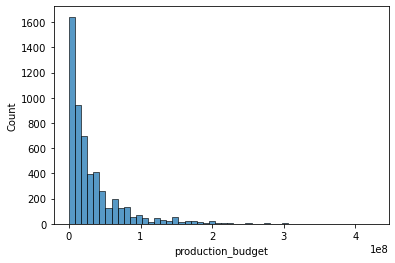

In [110]:
import seaborn as sns
sns.histplot(tn_df['production_budget'], bins=50);


The  **production budget** is **left-skewed**, which means:
- There are **fewer films with very low budgets**, which pull the **tail to the left**.
  
- Most films in the  dataset had **large budgets**.
- Only a few had **unusually small budgets**, making them the outliers on the lower end.

In [111]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = tn_df['production_budget'].quantile(0.25)
Q3 = tn_df['production_budget'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = tn_df[(tn_df['production_budget'] < lower_bound) | (tn_df['production_budget'] > upper_bound)]

print(f"Number of outliers: {len(outliers)}")
print(outliers[['production_budget']])

Number of outliers: 411
     production_budget
0            425000000
1            410600000
2            350000000
3            330600000
4            317000000
..                 ...
407           99000000
408           99000000
409           98000000
410           97000000
411           97000000

[411 rows x 1 columns]


We keep the outliers since these are true values. 

**Checking for outliers in the worldwide_gross column**

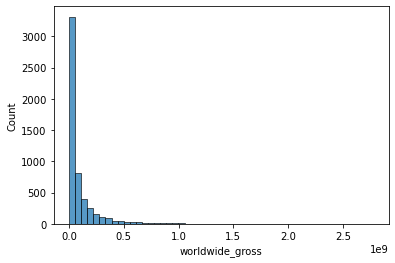

In [112]:
sns.histplot(tn_df['worldwide_gross'], bins=50);

The tail is longer to the left.Most films in the dataset likely had high gross earnings, while a few had very low earnings that pull the distribution left.

In [113]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = tn_df['worldwide_gross'].quantile(0.25)
Q3 = tn_df['worldwide_gross'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = tn_df[(tn_df['worldwide_gross'] < lower_bound) | (tn_df['worldwide_gross'] > upper_bound)]

print(f"Number of outliers: {len(outliers)}")
print(outliers[['worldwide_gross']])

Number of outliers: 564
      worldwide_gross
0          2776345279
1          1045663875
3          1403013963
4          1316721747
5          2053311220
...               ...
4249        278964806
4567        390525192
4589        261249383
4775        263591415
5346        268000000

[564 rows x 1 columns]


We also keep the outliers in the worldwide_gross column.

Now we will create a profit column that will allow us to see the profitability of each movie.



In [114]:
# Subtracting the production_budget from the worldwide_gross to calculate profit
tn_df['profit'] = tn_df['worldwide_gross'] - tn_df['production_budget']

# Previewing the first five rows
tn_df.head()


,id,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,Avatar,425000000,760507625,2776345279,2351345279
1,2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


**2.im.db**

In [115]:
import zipfile

# Extract the database file from the ZIP archive
with zipfile.ZipFile('zippedData\im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('zippedData')

# Connect to the extracted SQLite database
conn = sqlite3.connect('zippedData/im.db')

query = "SELECT name FROM sqlite_master WHERE type='table';"

tables = pd.read_sql_query(query, conn)

print("Tables in the database:")
print(tables)

Tables in the database:
            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [116]:
query = """
    SELECT *
    FROM (
        SELECT *
        FROM persons
        JOIN directors USING (person_id)
        JOIN movie_basics USING (movie_id)
        JOIN movie_ratings USING (movie_id)
    ) AS subquery;
"""
imdb_df = pd.read_sql(query, conn)
imdb_df.head()

,person_id,primary_name,birth_year,death_year,primary_profession,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous",tt1592569,Paano na kaya,Paano na kaya,2010,110.0,"Drama,Romance",6.4,77
1,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous",tt1592569,Paano na kaya,Paano na kaya,2010,110.0,"Drama,Romance",6.4,77
2,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous",tt1592569,Paano na kaya,Paano na kaya,2010,110.0,"Drama,Romance",6.4,77
3,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous",tt1592569,Paano na kaya,Paano na kaya,2010,110.0,"Drama,Romance",6.4,77
4,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous",tt2057445,No Other Woman,No Other Woman,2011,101.0,"Drama,Romance,Thriller",6.4,256


In [117]:
imdb_df = imdb_df.drop(['birth_year', 'death_year', 'primary_profession', 'start_year', 'numvotes', 'primary_title', 'original_title'], axis=1)
imdb_df.head()

,person_id,primary_name,movie_id,runtime_minutes,genres,averagerating
0,nm0062879,Ruel S. Bayani,tt1592569,110.0,"Drama,Romance",6.4
1,nm0062879,Ruel S. Bayani,tt1592569,110.0,"Drama,Romance",6.4
2,nm0062879,Ruel S. Bayani,tt1592569,110.0,"Drama,Romance",6.4
3,nm0062879,Ruel S. Bayani,tt1592569,110.0,"Drama,Romance",6.4
4,nm0062879,Ruel S. Bayani,tt2057445,101.0,"Drama,Romance,Thriller",6.4


In [118]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181387 entries, 0 to 181386
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   person_id        181387 non-null  object 
 1   primary_name     181387 non-null  object 
 2   movie_id         181387 non-null  object 
 3   runtime_minutes  163584 non-null  float64
 4   genres           180047 non-null  object 
 5   averagerating    181387 non-null  float64
dtypes: float64(2), object(4)
memory usage: 8.3+ MB


In [119]:
imdb_df.describe()

,runtime_minutes,averagerating
count,163584.000000,181387.000000
mean,97.789484,6.217683
std,194.434689,1.388026
min,3.000000,1.000000
25%,84.000000,5.400000
50%,94.000000,6.300000
75%,107.000000,7.200000
max,51420.000000,10.000000


In [120]:
imdb_df.shape

(181387, 6)

In [121]:
imdb_df.isnull().sum()

person_id              0
primary_name           0
movie_id               0
runtime_minutes    17803
genres              1340
averagerating          0
dtype: int64

In [122]:
imdb_df.dropna(subset=['runtime_minutes', 'genres'], inplace= True)


In [123]:
imdb_df['runtime_minutes']= imdb_df['runtime_minutes'].astype('int64')

In [124]:
# Verifying the column for runtime_minutes is changed
assert imdb_df['runtime_minutes'].dtype == 'int64', "Conversion to int64 failed"

##### ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## **Exploratory Data Analysis**

In this section, we perform Exploratory Data Analysis (EDA) to summarize and visualize the
main characteristics of our datasets uhich will be useful for addressing the objectives


*Objective 1:Evaluating the Relationship Between production Budget and Profitability*

**Univariate Analysis**

In this section, we examine the distribution of the production budget variable using a combination of a histogram and a Kernel Density Estimate (KDE) plot. This helps visualize how production budgets are spread across different movies, highlighting patterns such as skewness and the presence of extreme values. By understanding this distribution, we can make informed decisions about how to handle the data in later stages of analysis.

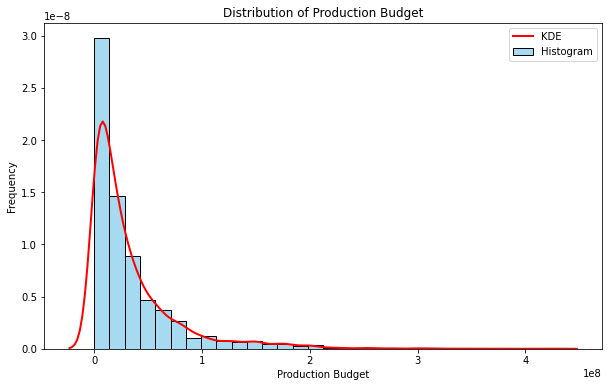

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Histogram and KDE together
plt.figure(figsize=(10, 6))
sns.histplot(tn_df['production_budget'], bins=30, color='skyblue', edgecolor='black', stat='density', label='Histogram')
sns.kdeplot(tn_df['production_budget'], color='red', linewidth=2, label='KDE')
plt.title('Distribution of Production Budget')
plt.xlabel('Production Budget')
plt.ylabel('Frequency')
plt.legend()
plt.show()



**Distribution of Production Budgets in Relation to Movie Frequency**  
- Most films are produced with relatively low budgets, as shown by the concentration of entries on the lower end of the budget range.  
- There is a noticeable decline in the number of movies as production budgets rise, indicating that high-budget films are less common.

**Bivariate Analysis**

 **Relationship Between Production Budgets and Profits for Movies**


Bivariate analysis examines the relationship between two variables. It helps you understand how one variable changes in relation to another—whether there's a correlation, trend, or association between them. So we are going to be comparing production budget and profit to see if higher budgets lead to more profit.

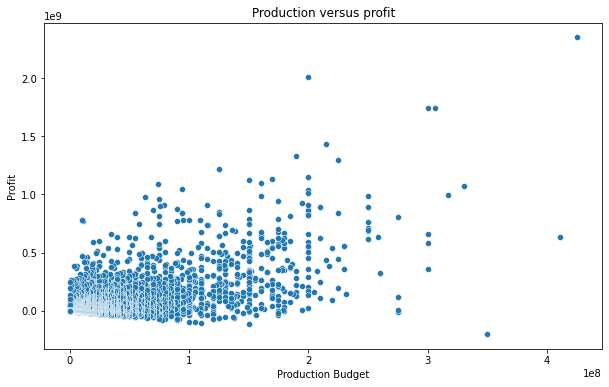

In [126]:

# Calculate the profit column
tn_df['profit'] = tn_df['worldwide_gross'] - tn_df['production_budget']

# Creating the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_budget', y='profit', data = tn_df)
plt.xlabel('Production Budget')
plt.ylabel('Profit')
plt.title('Production versus profit')
plt.show();

The scatter plot shows that movies with larger production budgets tend to generate higher profits, as indicated by the greater concentration of high-profit points at the upper end of the budget scale.

**Multivariate analysis**



In the Multivariate Analysis section, we explore the relationships among more than two variables at once. This broader perspective allows for a more thorough understanding of the data's complexity, revealing patterns, associations, and key factors essential for developing strong and precise predictive models.

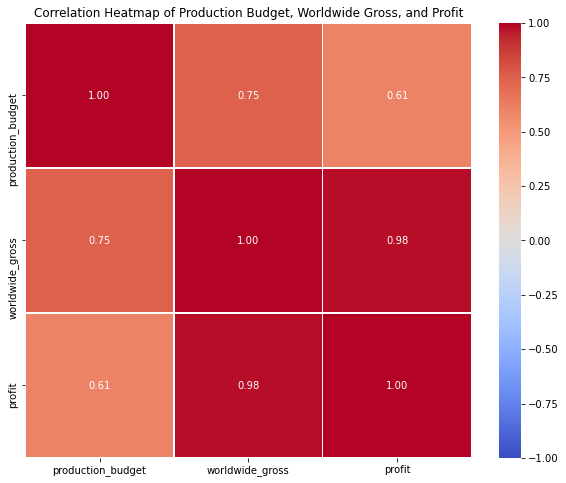

In [127]:
# Select the columns to use
columns = ['production_budget', 'worldwide_gross', 'profit']
# Creating a subset of the DataFrame with the specified columns
Heatmap_df = tn_df[columns]
# Computing the correlation matrix
corr_matrix = Heatmap_df.corr()
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Production Budget, Worldwide Gross, and Profit')
plt.show()

Production Budget versus. Worldwide Gross: There is a strong positive correlation of 0.75 indicating that movies with larger production budgets typically achieve higher worldwide gross revenues.

Production Budget versus. Profit: A moderate positive correlation of 0.61 suggests that increasing the production budget often leads to higher profits, though this link is not as strong as with worldwide gross.

Worldwide Gross versus Profit: Although the specific correlation value isn't provided, the relationship is expected to be strong, given the positive ties both metrics have with production budget.

## **Hypothesis Testing** 

Evaluating the Relationship Between production Budget and Profitability


To better understand how financial inputs and outcomes are interconnected in the film industry, we aim to assess whether a movie’s production budget  significantly influence its profitability. This exploration is grounded in the following hypotheses:

H₀:There is no significant linear relationship between production budget and  profitability.

H₁:There is a significant linear relationship between production budget and profitability.



**The Pearson correlation coefficient was computed to determine the linear association between production budget and profit.**

In [128]:
from scipy.stats import pearsonr

# set the alpha to 0.05
alpha = 0.05
# Calculate both the Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(tn_df['production_budget'], tn_df['profit'])
print(f"The P-value is : {p_value}")
print(f"The Pearson Correlation Coefficient is: {correlation}")

if p_value < alpha:
	print("Reject the null hypothesis.There is a significant linear relationship between the profit and production budget")
else:
	print("Fail to reject the null hypothesis. There is no sufficient evidence to show a linear relationship between the profit and production budget")


The P-value is : 0.0
The Pearson Correlation Coefficient is: 0.6068652923681527
Reject the null hypothesis.There is a significant linear relationship between the profit and production budget


From the output above we can clearly see that A moderate positive correlation of 0.61 suggests that increasing the production budget often leads to higher profits, though this link is not as strong as with worldwide gross.
Moreover from our correlation matrix we can see that there is a strong positive correlation of 0.75 indicating that movies with larger production budgets typically achieve higher worldwide gross revenues.
 
 This could further be shown visually as shown in the figure below



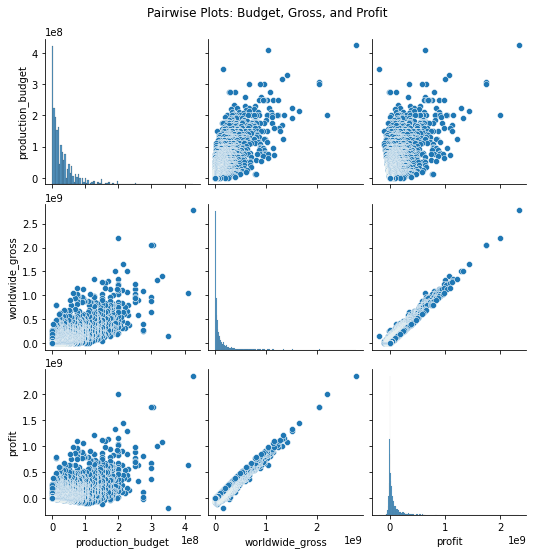

In [129]:
# Pairplot for visualization
sns.pairplot(tn_df[['production_budget', 'worldwide_gross', 'profit']])
plt.suptitle('Pairwise Plots: Budget, Gross, and Profit', y=1.02)
plt.show()

**Conclusions**
 
 Increasing the production budget often leads to higher profits
 Movies with larger production budgets typically achieve higher worldwide gross revenues.
 

**Recommendations**

Enhance Profitability Tracking: Implement metrics for profit margin and return on investment (ROI) to better evaluate the success of each project.
Refine Budget Allocation Strategies: Invest in production budgets that are high enough to drive profitability, but remain mindful of overspending. Analyze past performance to identify a budget threshold that maximizes returns without crossing into diminishing profit margins.

We restrict the imdb_df DataFrame to include only movies with runtimes between 30 and 200 minutes, ensuring the analysis focuses on films with typical and realistic durations.

*Objective 2:Determine if there is a difference in audience ratings between the shorter and longer films*



In [130]:
#Filter to keep movies with runtime between 30 and 200 minutes
imdb_df = imdb_df[(imdb_df['runtime_minutes'] >= 30) & (imdb_df['runtime_minutes'] <= 200)]
imdb_df.head()

,person_id,primary_name,movie_id,runtime_minutes,genres,averagerating
0,nm0062879,Ruel S. Bayani,tt1592569,110,"Drama,Romance",6.4
1,nm0062879,Ruel S. Bayani,tt1592569,110,"Drama,Romance",6.4
2,nm0062879,Ruel S. Bayani,tt1592569,110,"Drama,Romance",6.4
3,nm0062879,Ruel S. Bayani,tt1592569,110,"Drama,Romance",6.4
4,nm0062879,Ruel S. Bayani,tt2057445,101,"Drama,Romance,Thriller",6.4


**Univariate Analysis**


**Distribution of Average rating*



The distribution of average ratings shows how movies are rated by viewers.

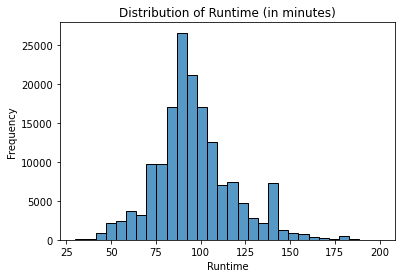

In [131]:
sns.histplot(imdb_df['runtime_minutes'], bins=30, kde=False)
plt.title('Distribution of Runtime (in minutes)')
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.show()

The distribution of movie runtimes is roughly bell-shaped, resembling a normal distribution, but with a slight right skew.
The highest concentration of movies is between 90 and 100 minutes, suggesting that this is the most common length for films in the dataset.

**Plotting the distribution of Average rating**


The Distribution of average ratings illustrates how viewers evaluate movies, offering insight into audience perceptions of movie quality within the dataset.  

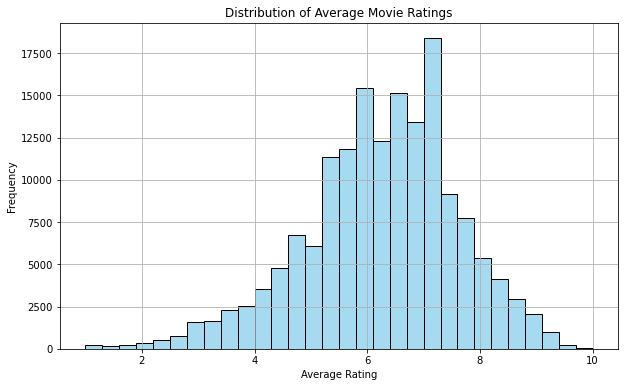

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(imdb_df['averagerating'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Average Movie Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

From the above we can see that the highest concentration of the average movie  ratings is between around 5.9 and 7.5

**Bivariate Analysis**


In this section, we examine the relationship between a movie’s runtime and its average rating.This will help us explore how two continuous variables relate to one another—in this case, whether longer or shorter films tend to receive higher or lower audience ratings. Understanding this relationship can offer valuable insights for content planning and production decisions.

In [133]:
#create a copy of the imdb
filt_imdb = imdb_df.copy()

In [134]:
#Create a new column categorizing movies as 'Shorter' or 'Longer'
filt_imdb['runtime_group'] = filt_imdb['runtime_minutes'].apply(
    lambda x: 'Longer' if x > 120 else 'Shorter')

# Display the first 20 rows of the new column
filt_imdb['runtime_group'].head(20)


0     Shorter
1     Shorter
2     Shorter
3     Shorter
4     Shorter
5     Shorter
6     Shorter
7     Shorter
10    Shorter
11    Shorter
12    Shorter
13    Shorter
14     Longer
15    Shorter
16    Shorter
17    Shorter
18    Shorter
19    Shorter
24    Shorter
25    Shorter
Name: runtime_group, dtype: object

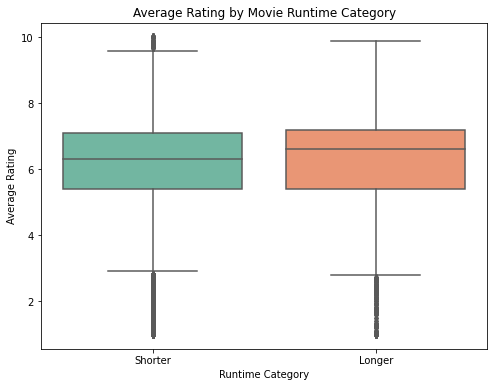

In [135]:
#Box plot for the runtime_group by movie average rating
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='runtime_group', y='averagerating', data=filt_imdb, palette='Set2')
plt.title('Average Rating by Movie Runtime Category')
plt.xlabel('Runtime Category')
plt.ylabel('Average Rating')
plt.show()

Overall, the plot suggests that longer movies might generally receive higher average ratings.

The box plot compares average ratings of movies based on their runtime categories—'Shorter' (≤120 minutes) and 'Longer' (>120 minutes). It reveals that longer movies tend to have a slightly higher median rating than shorter ones.

The rating distribution for longer movies shows greater variability, as indicated by a wider interquartile range.

### **Hypothesis Testing**


H₀: There is no  difference in audience ratings between the shorter and the longer films.

H₁: There is a  difference in audience ratings between the  shorter and the longer films.

In [136]:
#Group the data into 'Shorter' and 'Longer' based on the runtime_group column
Shorter = filt_imdb[filt_imdb['runtime_group'] == 'Shorter']['averagerating']
Longer = filt_imdb[filt_imdb['runtime_group'] == 'Longer']['averagerating']


In [137]:
#Testing for the equality of variances using the levene's test
from scipy.stats import levene

stat, p = levene(Shorter, Longer)
if p_value <= 0.05:
    print("The variances are not equal")
else:
    print("The variances are equal")


The variances are not equal


In [138]:

#Perform the t-test
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(Shorter, Longer, equal_var=True)
print(f't-stat:{t_stat}, p_value: {p_value}')

t-stat:-18.1935941280581, p_value: 6.874392240583262e-74


**Decision**


Alpha = 0.05

So at 95% level of confidence we reject the null hypothesis and conclude that there is a statistically significant difference in the audience ratings between the shorter and the Longer films 

**Conclusions**


1.There is a difference in the audience ratings between the shorter and the longer films

2.Longer films tend to have a slightly higher median rating than shorter ones.


3.The rating distribution for longer movies shows greater variability, as indicated by a wider interquartile range.


**Recommendations**

1.Consider Investing in Longer-Format Films


Since longer films tend to receive slightly higher audience ratings, allocating more resources to developing or acquiring quality longer-format content could enhance audience satisfaction and brand reputation.

2.Focus on Quality Storytelling for Long Films


The wider variability in ratings for long movies suggests they can either perform very well or poorly. Focus on strong scripts, editing, and pacing to ensure that longer runtimes deliver consistent viewer engagement.

## Identify the Best Directors to Work With

To find the best directors to work with, we simply check for movie ratings then check the name of the associated director. The directors most associated with high ratings are our target

In [139]:
# Take the director name and the ratings of their movies from the imdb dataframe
directors_df = imdb_df[['primary_name', 'averagerating']]
directors_df

,primary_name,averagerating
0,Ruel S. Bayani,6.4
1,Ruel S. Bayani,6.4
2,Ruel S. Bayani,6.4
3,Ruel S. Bayani,6.4
4,Ruel S. Bayani,6.4
...,...,...
181381,Benjamin Ovesen,7.4
181382,Frank W Chen,5.8
181383,Frank W Chen,5.8
181384,Prasobh Vijayan,5.7


In [140]:
# Group the directors by their name to calculate the average rating of their movies
directors_df = directors_df.groupby('primary_name').agg(
    Average_Rating=('averagerating', 'mean'),
    Movie_Count=('averagerating', 'count')
).reset_index()

directors_df

,primary_name,Average_Rating,Movie_Count
0,A Normale Jef,7.20,46
1,A'Ali de Sousa,4.20,1
2,A. Blaine Miller,7.00,1
3,A. Cengiz Mert,3.20,1
4,A. Fishman,7.80,1
...,...,...,...
51343,Ümit Kivanç,7.90,2
51344,Ümit Köreken,6.40,3
51345,Ümit Uludag,9.20,1
51346,Ümit Ünal,5.95,4


In [141]:
# Sort the directors by the average rating of their movies
top_rated = directors_df.sort_values(by='Average_Rating', ascending=False).head(20)
top_rated

,primary_name,Average_Rating,Movie_Count
28376,Lindsay Thompson,10.0,1
19601,Ivana Diniz,10.0,2
14017,Emre Oran,10.0,1
33339,Michiel Brongers,10.0,1
31339,Masahiro Hayakawa,10.0,1
28640,Loreto Di Cesare,10.0,2
25503,Kalyan Varma,9.9,1
39430,Raphael Sbarge,9.9,1
34591,Nagaraja Uppunda,9.9,1
2915,Andrew Jezard,9.9,1


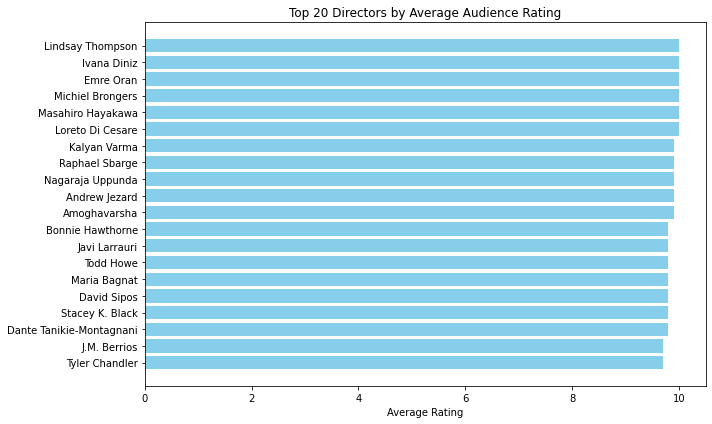

In [142]:
# visualize the top rated directors
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_rated['primary_name'], top_rated['Average_Rating'], color='skyblue')
plt.xlabel('Average Rating')
plt.title('Top 20 Directors by Average Audience Rating')
plt.gca().invert_yaxis()  # Highest rating at the top
plt.tight_layout()
plt.show()

The highest rated directors seem to have worked on very few movies. We need to find the ones with some experience in the industry

In [143]:
# Sort the directors by the number of movies directed to gauge their experience level
experienced_df = directors_df.sort_values(by='Movie_Count', ascending=False).head(10)
experienced_df

,primary_name,Average_Rating,Movie_Count
43773,Shane Ryan,5.626452,155
48068,Tony Newton,4.785385,130
41473,Ruben Rodriguez,6.079845,129
9547,Corey Norman,6.017757,107
20943,Jason Impey,5.158824,102
14712,Evan Marlowe,6.403000,100
20255,James Cullen Bressack,4.601020,98
37127,Patrick Rea,6.153933,89
19663,Izzy Lee,5.518293,82
16330,Gav Chuckie Steel,6.558025,81


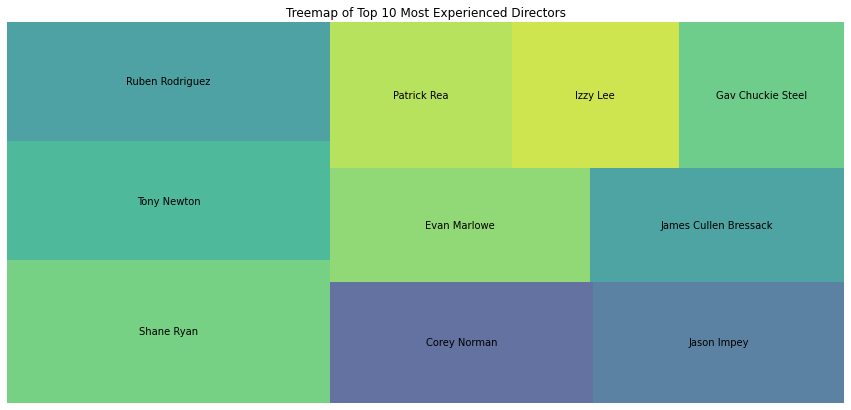

In [144]:
# visualize the most experienced directors
import squarify

plt.figure(figsize=(15, 7))
squarify.plot(sizes= experienced_df['Movie_Count'], label=experienced_df['primary_name'], alpha=.8)
plt.axis('off')
plt.title('Treemap of Top 10 Most Experienced Directors')
plt.show()


To find the best directors to recommend, we need to take into account both experience level and ratings. So we have to sort by movie count (experience) then pick the best rated among these

In [145]:
# sort directors by movie count then pick the best rated among these experienced directors
best_directors_df = directors_df.sort_values(by='Movie_Count', ascending=False).head(10)
best_directors_df

,primary_name,Average_Rating,Movie_Count
43773,Shane Ryan,5.626452,155
48068,Tony Newton,4.785385,130
41473,Ruben Rodriguez,6.079845,129
9547,Corey Norman,6.017757,107
20943,Jason Impey,5.158824,102
14712,Evan Marlowe,6.403000,100
20255,James Cullen Bressack,4.601020,98
37127,Patrick Rea,6.153933,89
19663,Izzy Lee,5.518293,82
16330,Gav Chuckie Steel,6.558025,81


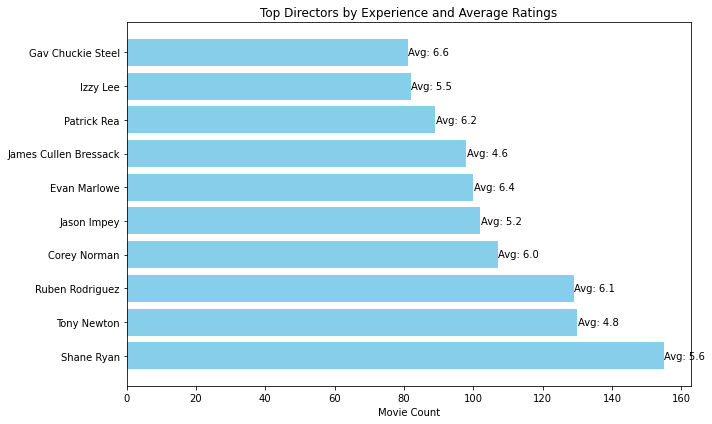

In [146]:
# visualize the data

plt.figure(figsize=(10, 6))
bars = plt.barh(best_directors_df['primary_name'],best_directors_df['Movie_Count'], color='skyblue')

# Annotate each bar with average rating
for bar, rating in zip(bars, best_directors_df['Average_Rating']):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
             f'Avg: {rating:.1f}', va='center')

plt.xlabel('Movie Count')
plt.title('Top Directors by Experience and Average Ratings')
plt.tight_layout()
plt.show()


Now we'll plot two axes to show both ratings and number of movies for each director on the same figure

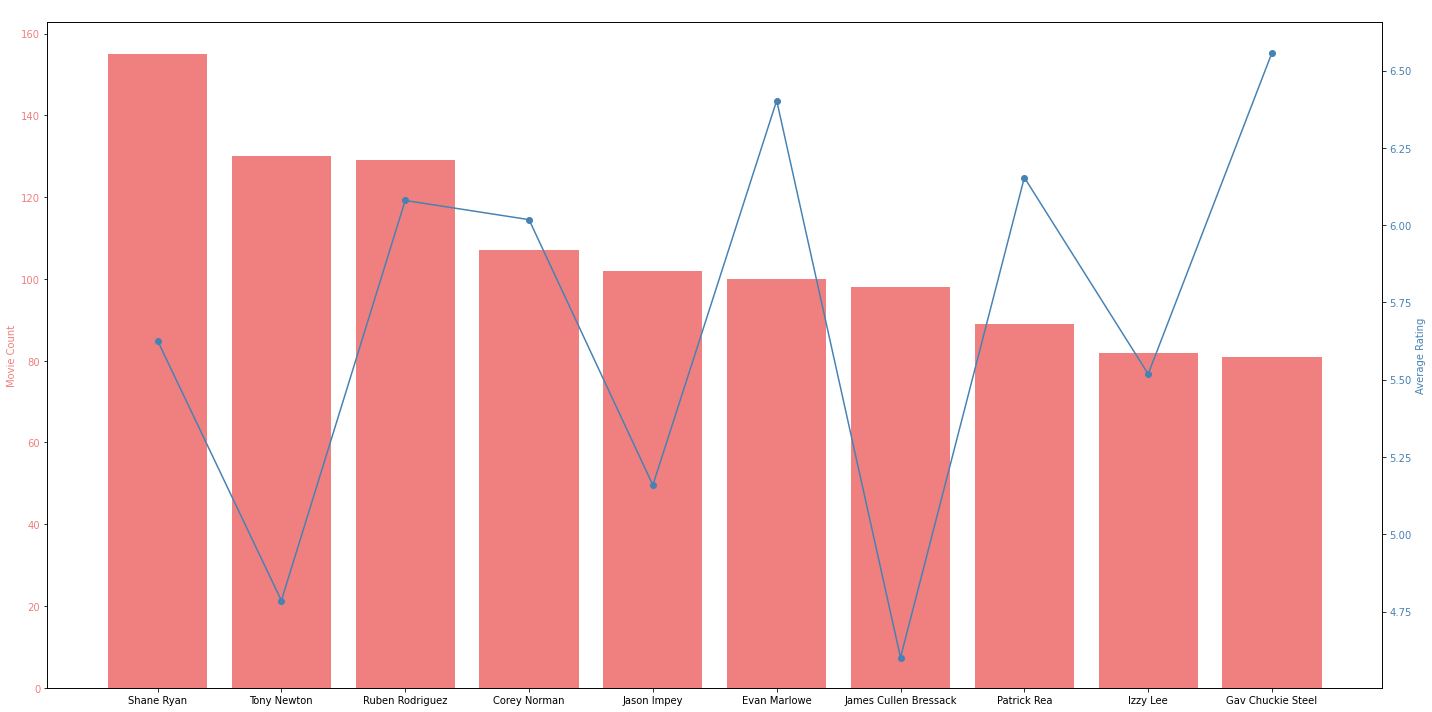

In [147]:
# plot a dual axis bar and line graphs
fig, ax1 = plt.subplots(figsize=(20, 10))

# Bar plot for movie count
ax1.bar(best_directors_df['primary_name'], best_directors_df['Movie_Count'], color='lightcoral')
ax1.set_ylabel('Movie Count', color='lightcoral')
ax1.tick_params(axis='y', labelcolor='lightcoral')

# Line plot for average rating
ax2 = ax1.twinx()
ax2.plot(best_directors_df['primary_name'], best_directors_df['Average_Rating'], color='steelblue', marker='o')
ax2.set_ylabel('Average Rating', color='steelblue')
ax2.tick_params(axis='y', labelcolor='steelblue')

plt.title('Best Directors: Movie Count (experience) and Average Rating', color = 'white')
plt.tight_layout()
plt.show()


From the visualization above, the best directors out of these according to their ratings and experience are: 
1. Sergey A.
2. Evan Marlowe
3. Patrick Rea
4. Ruben Rodriguez
5. Corey Norman

# Dropping Duplicates

## Step 1: Remove Duplicate Movie Entries
This step ensures that each movie is only counted once by removing any duplicate rows from the IMDb dataset.



In [148]:
imdb_df = imdb_df.drop_duplicates()
imdb_df

,person_id,primary_name,movie_id,runtime_minutes,genres,averagerating
0,nm0062879,Ruel S. Bayani,tt1592569,110,"Drama,Romance",6.4
4,nm0062879,Ruel S. Bayani,tt2057445,101,"Drama,Romance,Thriller",6.4
7,nm0062879,Ruel S. Bayani,tt2590280,100,Drama,5.8
10,nm0064023,Bryan Beasley,tt4512140,53,Documentary,8.9
11,nm0067234,Hans Beimler,tt2098699,90,Drama,5.8
...,...,...,...,...,...,...
181380,nm9541799,Hamed Saleh,tt7849092,84,Comedy,6.5
181381,nm9701687,Benjamin Ovesen,tt8146836,55,Drama,7.4
181382,nm9748617,Frank W Chen,tt8234502,99,"Documentary,Sport",5.8
181384,nm9769561,Prasobh Vijayan,tt8273258,91,Thriller,5.7


# Handling Genre Data
## Step 2: Normalize Genre Data into Individual Rows
Movies with multiple genres are split so each genre appears in its own row. This structure allows accurate per-genre analysis.


In [149]:
imdb_df['genres'] = imdb_df['genres'].str.split(',')
imdb_df = imdb_df.explode('genres')

imdb_df

,person_id,primary_name,movie_id,runtime_minutes,genres,averagerating
0,nm0062879,Ruel S. Bayani,tt1592569,110,Drama,6.4
0,nm0062879,Ruel S. Bayani,tt1592569,110,Romance,6.4
4,nm0062879,Ruel S. Bayani,tt2057445,101,Drama,6.4
4,nm0062879,Ruel S. Bayani,tt2057445,101,Romance,6.4
4,nm0062879,Ruel S. Bayani,tt2057445,101,Thriller,6.4
...,...,...,...,...,...,...
181382,nm9748617,Frank W Chen,tt8234502,99,Documentary,5.8
181382,nm9748617,Frank W Chen,tt8234502,99,Sport,5.8
181384,nm9769561,Prasobh Vijayan,tt8273258,91,Thriller,5.7
181385,nm9781362,Grzegorz Jankowski,tt4438688,93,Comedy,5.2


# Calculating Average Rating by Genre
## Step 3: Compute Average Rating for Each Genre
The dataset is grouped by genre, and the mean IMDb rating is calculated for each group. Results are sorted from highest to lowest rated genre.


In [150]:
genre_ratings = imdb_df.groupby('genres')['averagerating'].mean().sort_values(ascending=False)
genre_ratings

genres
Game-Show      7.300000
Documentary    7.298870
News           7.263418
Biography      7.147113
Music          7.085899
History        7.048842
Sport          6.995356
War            6.595243
Musical        6.492254
Family         6.405832
Drama          6.394353
Animation      6.273719
Adventure      6.200232
Reality-TV     6.163636
Romance        6.145869
Crime          6.104669
Comedy         6.020658
Fantasy        5.917955
Mystery        5.898125
Western        5.831317
Action         5.785424
Thriller       5.575057
Sci-Fi         5.500688
Horror         4.969244
Adult          3.300000
Name: averagerating, dtype: float64